Chapter 14 - Generalized Linear Models

In [7]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.to_csv('C:/Users/franj/notebooks/pandas for everyone/pandas-for-everyone/data/titanic.csv', index=False)

In [8]:
titanic_sub = (titanic[['survived', 'sex', 'age', 'embarked']].copy().dropna())
print(titanic_sub)

     survived     sex   age embarked
0           0    male  22.0        S
1           1  female  38.0        C
2           1  female  26.0        S
3           1  female  35.0        S
4           0    male  35.0        S
..        ...     ...   ...      ...
885         0  female  39.0        Q
886         0    male  27.0        S
887         1  female  19.0        S
889         1    male  26.0        C
890         0    male  32.0        Q

[712 rows x 4 columns]


In [9]:
# count of values in the survived column
print(titanic_sub["survived"].value_counts())

survived
0    424
1    288
Name: count, dtype: int64


In [10]:
# count of values in the embarked column
print(titanic_sub["embarked"].value_counts())

embarked
S    554
C    130
Q     28
Name: count, dtype: int64


In [11]:
import statsmodels.formula.api as smf

# formula for the model
form = 'survived ~ sex + age + embarked'

# fitting the logistic regression model, note the .fit() at the end
py_logistic_smf = smf.logit(formula=form, data=titanic_sub).fit()

print(py_logistic_smf.summary())

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.2444
Time:                        18:55:56   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2046      0.322      6.851      0.000       1.574       2.835
sex[T.male]      -2.

In [12]:
import numpy as np
import pandas as pd

# get the coefficients into a dataframe
res_sm = pd.DataFrame(py_logistic_smf.params, columns=["coefs_sm"])

# calculate the odds
res_sm["odds_sm"] = np.exp(res_sm["coefs_sm"])

# round the decimals
print(res_sm.round(3))

               coefs_sm  odds_sm
Intercept         2.205    9.066
sex[T.male]      -2.476    0.084
embarked[T.Q]    -1.816    0.163
embarked[T.S]    -1.007    0.365
age              -0.008    0.992


In [13]:
titanic_dummy = pd.get_dummies(
    titanic_sub[["survived", "sex", "age", "embarked"]],
    drop_first=True
)

# note our outcome variable is the first column (index 0)
print(titanic_dummy)

     survived   age  sex_male  embarked_Q  embarked_S
0           0  22.0      True       False        True
1           1  38.0     False       False       False
2           1  26.0     False       False        True
3           1  35.0     False       False        True
4           0  35.0      True       False        True
..        ...   ...       ...         ...         ...
885         0  39.0     False        True       False
886         0  27.0      True       False        True
887         1  19.0     False       False        True
889         1  26.0      True       False       False
890         0  32.0      True        True       False

[712 rows x 5 columns]


In [ ]:
from sklearn import linear_model

# this is the only part that fits the model
py_logistic_sklearn1 = (
    linear_model.LogisticRegression().fit(
        X=titanic_dummy.iloc[:, 1:], # all the columns except first
        y=titanic_dummy.iloc[:, 0] # just the first column
    )
)

In [16]:
# get the names of the dummy variable columns
dummy_names = titanic_dummy.columns.to_list()

# get the intercept and coefficients into a dataframe
sk1_res1 = pd.DataFrame(
    py_logistic_sklearn1.intercept_,
    index=["Intercept"],
    columns=["coef_sk1"],
)
sk1_res2 = pd.DataFrame(
    py_logistic_sklearn1.coef_.T,
    index=dummy_names[1:],
    columns=["coef_sk1"],
)

# put the results into a single dataframe to show the results
res_sklearn_pd_1 = pd.concat([sk1_res1, sk1_res2])

# calculate the odds
res_sklearn_pd_1["odds_sk1"] = np.exp(res_sklearn_pd_1["coef_sk1"])
print(res_sklearn_pd_1.round(3))

            coef_sk1  odds_sk1
Intercept      2.024     7.571
age           -0.008     0.992
sex_male      -2.372     0.093
embarked_Q    -1.369     0.254
embarked_S    -0.887     0.412


In [17]:
# fit another logistic regression with no penalty
py_logistic_sklearn2 = linear_model.LogisticRegression(
    penalty="none" # this parameter is important!
).fit(
    X=titanic_dummy.iloc[:, 1:], # all the columns except first
    y=titanic_dummy.iloc[:, 0] # just the first column
)

# rest of the code is the same as before, except variable names
sk2_res1 = pd.DataFrame(
    py_logistic_sklearn2.intercept_,
    index=["Intercept"],
    columns=["coef_sk2"],
)
sk2_res2 = pd.DataFrame(
    py_logistic_sklearn2.coef_.T,
    index=dummy_names[1:],
    columns=["coef_sk2"],
)

res_sklearn_pd_2 = pd.concat([sk2_res1, sk2_res2])
res_sklearn_pd_2["odds_sk2"] = np.exp(res_sklearn_pd_2["coef_sk2"])

sm_results = res_sm.round(3)

# sort values to make things easier to compare
sm_results = sm_results.sort_index()
print(sm_results)

               coefs_sm  odds_sm
Intercept         2.205    9.066
age              -0.008    0.992
embarked[T.Q]    -1.816    0.163
embarked[T.S]    -1.007    0.365
sex[T.male]      -2.476    0.084


c:\Users\franj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [18]:
# concatenate the 2 model results
sk_results = pd.concat(
    [res_sklearn_pd_1.round(3), res_sklearn_pd_2.round(3)],
    axis="columns",
)

# sort cols and rows to make things easy to compare
sk_results = sk_results[sk_results.columns.sort_values()]
sk_results = sk_results.sort_index()

print(sk_results)

            coef_sk1  coef_sk2  odds_sk1  odds_sk2
Intercept      2.024     2.205     7.571     9.066
age           -0.008    -0.008     0.992     0.992
embarked_Q    -1.369    -1.816     0.254     0.163
embarked_S    -0.887    -1.007     0.412     0.365
sex_male      -2.372    -2.476     0.093     0.084


In [19]:
# poisson regression
acs = pd.read_csv('C:/Users/franj/notebooks/pandas for everyone/pandas-for-everyone/data/acs_ny.csv')
print(acs.columns)

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')


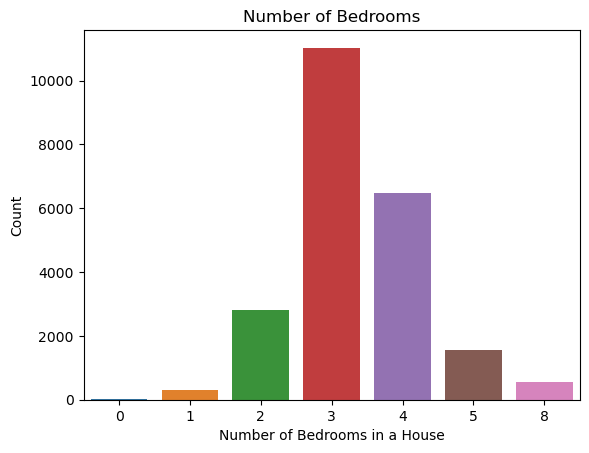

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.countplot(data = acs, x = "NumBedrooms", ax=ax)

ax.set_title('Number of Bedrooms')
ax.set_xlabel('Number of Bedrooms in a House')
ax.set_ylabel('Count')

plt.show()

In [21]:
model = smf.poisson("NumBedrooms ~ HouseCosts + OwnRent", data=acs)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 1.680998
         Iterations 10
                          Poisson Regression Results                          
Dep. Variable:            NumBedrooms   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22741
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.008309
Time:                        19:23:37   Log-Likelihood:                -38234.
converged:                       True   LL-Null:                       -38555.
Covariance Type:            nonrobust   LLR p-value:                1.512e-138
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1387      0.006    184.928      0.000       1.127       1.151
O

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(
    "NumBedrooms ~ HouseCosts + OwnRent",
    data=acs,
    family=sm.families.Poisson(sm.genmod.families.links.log()),
).fit()

c:\Users\franj\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [23]:
print(results.summary())

                          Poisson Regression Results                          
Dep. Variable:            NumBedrooms   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22741
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.008309
Time:                        19:26:30   Log-Likelihood:                -38234.
converged:                       True   LL-Null:                       -38555.
Covariance Type:            nonrobust   LLR p-value:                1.512e-138
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1387      0.006    184.928      0.000       1.127       1.151
OwnRent[T.Outright]    -0.2659      0.051     -5.182      0.000      -0.367      -0.165
OwnRent[T.Rented

<Axes: xlabel='NumPeople', ylabel='count'>

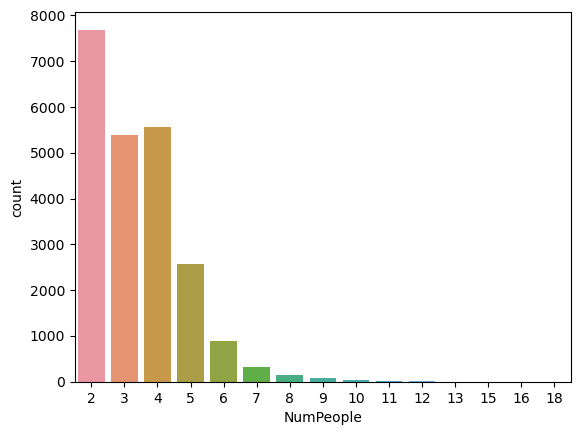

In [24]:
# negative binomial regression for overdispersion

fig, ax = plt.subplots()

sns.countplot(data = acs, x = "NumPeople", ax=ax)

In [26]:
ax.set_title('Number of People')
ax.set_xlabel('Number of People in a House')
ax.set_ylabel('Count')

plt.show()

model = smf.glm("NumPeople ~ Acres + NumVehicles", data=acs, family=sm.families.NegativeBinomial(sm.genmod.families.links.log()))
results = model.fit()

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              NumPeople   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22741
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53542.
Date:                Tue, 25 Mar 2025   Deviance:                       2605.6
Time:                        19:30:38   Pearson chi2:                 2.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.003504
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0418      0.025     41.

c:\Users\franj\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\franj\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [27]:
print(acs["Acres"].value_counts())

Acres
Sub 1    17114
1-10      4627
10+       1004
Name: count, dtype: int64
